## Observations and Insights

## Dependencies and starter code

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = study_results.merge(mouse_metadata, on=['Mouse ID'])

In [2]:
data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


## Summary statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

drg_grp = data.groupby(['Drug Regimen'])

drg_tumor = drg_grp['Tumor Volume (mm3)']

mean_tumor = drg_tumor.mean()

median_tumor = drg_tumor.median()

sd_tumor = drg_tumor.std()

sem_tumor = drg_tumor.sem()


sum_stat = pd.DataFrame({"Tumor Mean":mean_tumor,"Tumor Median":median_tumor,"Tumor Std. Deviation":sd_tumor,
                        "Tumor SEM":sem_tumor})
sum_stat.head(10).sort_values('Tumor Mean')

,Tumor Mean,Tumor Median,Tumor Std. Deviation,Tumor SEM
Drug Regimen,,,,
Ramicane,40.216745,40.673236,4.846308,0.320955
Capomulin,40.675741,41.557809,4.994774,0.329346
Propriva,52.322552,50.854632,6.507770,0.512884
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Zoniferol,53.236507,51.818479,6.966589,0.516398
Placebo,54.033581,52.288934,7.821003,0.581331
Stelasyn,54.233149,52.431737,7.710419,0.573111
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_count = data['Drug Regimen'].value_counts()

regimen_df = pd.DataFrame({"Total Regimen Counts": regimen_count})
regimen_df.head(10)

,Total Regimen Counts
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


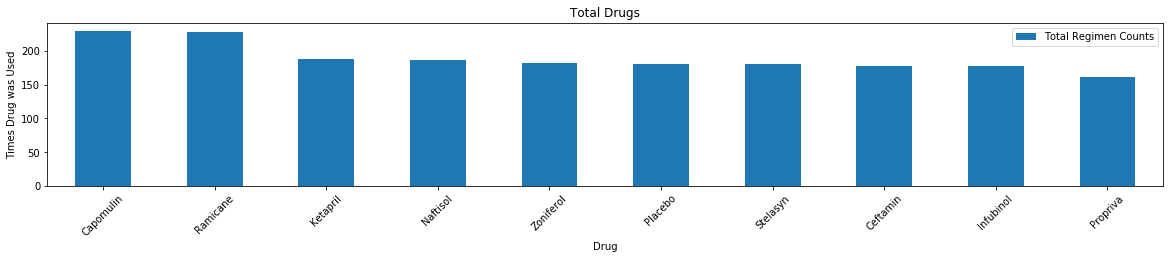

<Figure size 432x288 with 0 Axes>

In [154]:
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_df.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Total Drugs")

plt.xticks(rotation=45)
plt.xlabel('Drug')
plt.ylabel("Times Drug was Used")

plt.show()
plt.tight_layout()

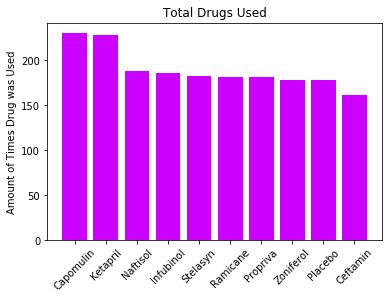

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

objects = data['Drug Regimen'].drop_duplicates()
y_pos = np.arange(len(objects))
performance = regimen_count

plt.bar(y_pos, performance, align='center',color = '#cc00ff')
plt.xticks(y_pos, objects, rotation=45)
plt.ylabel('Amount of Times Drug was Used')
plt.title('Total Drugs Used')

plt.show()

## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = data['Sex'].value_counts()

gender_df = pd.DataFrame({"Total Gender Count": gender_count})
gender_df.head()


,Total Gender Count
Male,958
Female,935


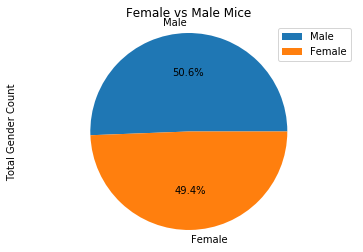

In [69]:
gender_df.plot(kind = 'pie', autopct="%1.1f%%", subplots = True)

# Set a title for the chart
plt.title("Female vs Male Mice")
plt.axis("equal")

plt.show()


In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Males","Females"]

# The values of each section of the pie chart
sizes = gender_count

# The colors of each section of the pie chart
colors = ["lightskyblue", "darksalmon"]

explode = ( .1, 0)

Text(0.5, 1.0, 'Female vs Male Mice')

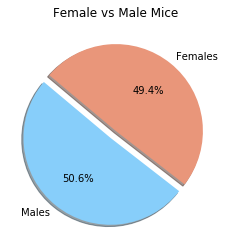

In [153]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs Male Mice")

## Quartiles, outliers and boxplots

In [141]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouseGroup = data.groupby(["Mouse ID"])
mouse = mouseGroup.last()

df = mouse.set_index("Drug Regimen")
drug_sort = df.loc[["Capomulin","Ramicane","Propriva","Ceftamin"], ["Tumor Volume (mm3)"]]


drug_capo = df.loc[["Capomulin"], ["Tumor Volume (mm3)"]]
drug_rami = df.loc[["Ramicane"], ["Tumor Volume (mm3)"]]
drug_prop = df.loc[["Propriva"], ["Tumor Volume (mm3)"]]
drug_ceft = df.loc[["Ceftamin"], ["Tumor Volume (mm3)"]]


drug_sort.head(10)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,38.982878
Capomulin,38.939633
Capomulin,30.485985
Capomulin,37.074024
Capomulin,40.159220
Capomulin,47.685963
Capomulin,37.311846
Capomulin,38.125164
Capomulin,38.753265


In [105]:
tumors = drug_sort["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumors is: {lowerq}")
print(f"The upper quartile of tumors is: {upperq}")
print(f"The interquartile range of tumors is: {iqr}")
print(f"The the median of tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumors is: 37.2898392225
The upper quartile of tumors is: 58.463205455
The interquartile range of tumors is: 21.1733662325
The the median of tumors is: 45.0 
Values below 5.529789873749998 could be outliers.
Values above 90.22325480375 could be outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

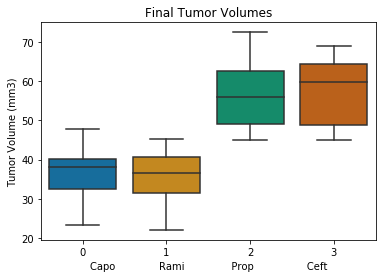

In [151]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

sns.boxplot(data=(drug_capo,drug_rami,drug_prop,drug_ceft), palette="colorblind")

plt.title("Final Tumor Volumes")
plt.xlabel("Capo              Rami               Prop                 Ceft")
plt.ylabel("Tumor Volume (mm3)")

## Line and scatter plots

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df = data.set_index("Drug Regimen")
capo_df = df.loc[["Capomulin"], ["Tumor Volume (mm3)","Timepoint", "Weight (g)", "Mouse ID"]]

capofil_df = capo_df[capo_df['Mouse ID']=='r554']

capo_df.head(20)

,Tumor Volume (mm3),Timepoint,Weight (g),Mouse ID
Drug Regimen,,,,
Capomulin,45.000000,0,22,b128
Capomulin,45.651331,5,22,b128
Capomulin,43.270852,10,22,b128
Capomulin,43.784893,15,22,b128
Capomulin,42.731552,20,22,b128
Capomulin,43.262145,25,22,b128
Capomulin,40.605335,30,22,b128
Capomulin,37.967644,35,22,b128
Capomulin,38.379726,40,22,b128


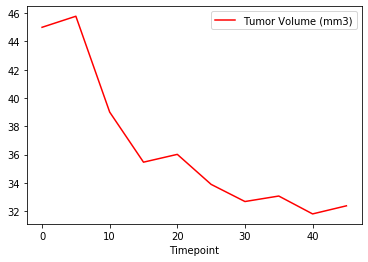

In [24]:
capofil_df.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',color='red')
plt.show()

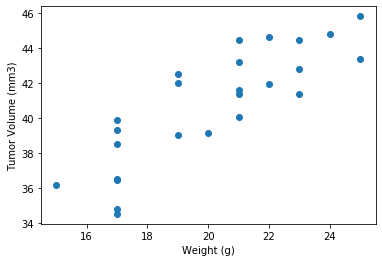

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

group_mouse = capo_df.groupby(['Mouse ID'])

tumor_avg = group_mouse['Tumor Volume (mm3)'].mean()
weight = group_mouse['Weight (g)'].mean()

x_values = weight
y_values = tumor_avg
plt.scatter(x_values,y_values)

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()



The r-squared is: 0.8419363424694718


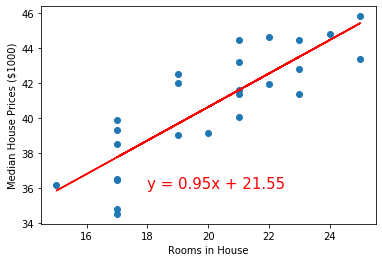

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#for the Capomulin regimen

x_values = weight
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue}")
plt.show()